# Week 6 (Tree-based Models)

## 2.1. Decision Tree

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 로드 및 전처리
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Q1.1 max_depth 파라미터를 변경하면 트리의 구조와 성능이 어떻게 변할까요?

In [ ]:
# 결정 트리 모델 생성 및 학습
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=2, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

### Q1.2 'gini'와 'entropy' 기준의 차이는 무엇이며, 결과에 어떤 영향을 미칠까요?

### Q1.3 각 노드의 분할 기준 어떻게 되는지 설명해보세요.

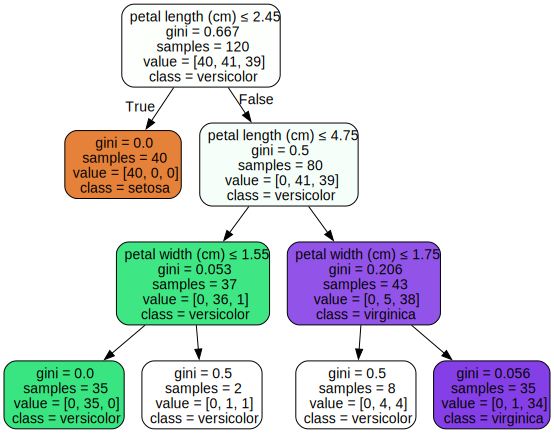

In [ ]:
# 트리 시각화 (Graphviz)
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    feature_names=X.columns,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

In [ ]:
# 그래프 출력
graph = graphviz.Source(dot_data)
graph

## 3. 앙상블 학습: 부스팅(Boosting) 모델

Adaboost, Gradient Boosting Model은 scikit learn에서 지원하지만, LightGBM과 XGBoost의 경우는 외부 패키지를 불러와야 합니다.

Boosting 계열의 모델들은 데이터 개수가 적으면 overfitting이 일어나는 경우가 많으니, 주의해야 합니다.

In [1]:
# 필요한 패키지 로드
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()

In [3]:
# 데이터 로드
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

In [5]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Q3.1 `housing_df`를 train, test split을 해봅시다.

분할 비율을 자유롭게 설정해봅시다.

In [6]:
# 데이터 분할
X = housing_df.drop(columns=['MedHouseVal'])
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=  , random_state=42)

### Q3.2  데이터를 `RandomForestRegressor`에 적합해 봅시다.
train set 에 대해 `MedHouseVal`을 종속변수, 나머지를 독립변수로 하는 random forest regressor를 적합해 봅시다.

test set으로 prediction을 한 후 MSE를 구해 봅시다.

In [7]:
from sklearn.ensemble import RandomForestRegressor

### Q3.3 데이터를 `AdaBoostRegressor`에 적합해봅시다.

위와 동일

In [9]:
from sklearn.ensemble import AdaBoostRegressor

### Q3.4 데이터를 `GradientBoostingRegressor`에 적합해 봅시다.

위와 동일

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

### Q3.5 데이터를 `lightgbm` 회귀에 적합해 봅시다.

파라미터를 자세히 살펴보고, 자유롭게 설정해 봅시다.

Documentation
https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

예시
https://www.geeksforgeeks.org/regression-using-lightgbm/


In [ ]:
import lightgbm as lgb

### Q3.6 데이터를 `xgboost`에 적합해 봅시다.

파라미터는 자유롭게 설정해 봅시다

In [15]:
import xgboost as xgb

### Q3.7 `RandomForestRegressor`의 feature importance를 시각화해봅시다.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

위를 참고해보면서 Q2에서 적합한 random forest regressor의 feature importance를 시각화해 봅시다.

중요한 feature 부터 내림차순으로 시각화해 봅시다.

### (BONUS) 1. Boosting 모델 각각의 특징을 정리해보세요.

### (BONUS) 2. 모델 성능을 높이기 위하여 어떤 시도를 하면 좋을지 고민해보세요.